목표 설정
kwipiepy 형태소 분석기를 사용해보고 konlpy와는 어떤점이 다른지 확인






kiwi 라이브러리

빠른 속도와 범용적인 성능을 지향하는 형태소 분석기
기반이 C++로 구현된 코어를 래핑해서 프로그래밍 언어에서 사용하도록 만들었다. / 오픈소스 공개
세종 품사 태그셋을 사용한다.
(공식 주장) 웹 텍스트 87퍼 / 문어체 텍스트는 94퍼 정확도로 형태소 분석이 가능하다.
knlnpy보다 속도가 빠르다. 간단한 오타나 띄어쓰기 스스로 교정할 수 있는 기능 제공

In [1]:
#나눔 고딕 설치
!sudo apt-get install -y fonts-nanum #폰트
!sudo fc-cache -fv #캐시 갱신
!rm -/.cache/matplotlib -rf #폰트 캐시 삭제

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

In [5]:
!pwd

/content


In [6]:
# 소스코드가 있는 경로로 위치를 변경
%cd /content/drive/MyDrive/Colab Notebooks/east

/content/drive/MyDrive/Colab Notebooks/east


In [7]:
!pwd

/content/drive/MyDrive/Colab Notebooks/east


In [8]:
train = pd.read_csv('data/ratings_train.csv', encoding='utf-8')

In [9]:
train

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [10]:
test = pd.read_csv('data/ratings_test.csv', encoding='utf-8')

In [11]:
test

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [12]:
#데이터 정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [14]:
#결측치 처리
train = train.dropna()
test = test.dropna()

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [16]:
# 데이터 분할 - 어떤컬럼이 문제데이터, 어떤컬럼이 정답데이터
X_train = train['document']
y_train = train['label']
X_test = test['document']
y_test = test['label']

In [17]:
# 데이터 분할
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((149995,), (149995,), (49997,), (49997,))

### kiwipiepy 라이브러리 설치하기
- kiwipiepy 라이브러리는 의존성이 없다. 편리하게 환경구축 가능하다.

In [18]:
!pip install kiwipiepy

In [19]:
#라이브러리 Import 키위파이 형태소 분석기 불러오기
from sklearn.feature_extraction.text import TfidfVectorizer
from kiwipiepy import Kiwi, basic_typos_with_continual

In [20]:
#객체 생성
kiwi = Kiwi(typos=basic_typos_with_continual)

###오타 교정 도구
- kiwipiepy는 간단한 오타 교정도구를 제공
- basic_typos: 형태소 내의 오타를 교정하는 기본적인 오타 교정 도구
- countinual_typos : 형태소 간의 오타를 교정하는 교정 도구
- basic_typos_with_continual : 위의 두가지 오타 교정도구를 하나로 합쳤다.

In [21]:
#형태소 분석
token = kiwi.tokenize("아버지가방에들어가신다")
token
#form : 실제 형태소
#tag : 품사 태그
#start : 형태소의 시작 인덱스
#len :

[Token(form='아버지', tag='NNG', start=0, len=3),
 Token(form='가', tag='JKS', start=3, len=1),
 Token(form='방', tag='NNG', start=4, len=1),
 Token(form='에', tag='JKB', start=5, len=1),
 Token(form='들어가', tag='VV', start=6, len=3),
 Token(form='시', tag='EP', start=9, len=1),
 Token(form='ᆫ다', tag='EF', start=9, len=2)]

In [22]:
#형태소 분석된 곳에서 태그만 가져오자
#.tag

token[0].tag

'NNG'

In [23]:
token[0].form

'아버지'

In [24]:
# 더미 문장 데이터를 이용해서 kiwi 라이브러리 사용법 익혀보기
text = '오늘은 목요일입니당. 금요일이 오기는 올까욬ㅋㅋㅋㅋㅋㅋㅋㅋ'
# 형태소 분석 시작
token = kiwi.tokenize(text)
token

[Token(form='오늘', tag='NNG', start=0, len=2),
 Token(form='은', tag='JX', start=2, len=1),
 Token(form='목요일', tag='NNG', start=4, len=3),
 Token(form='이', tag='VCP', start=7, len=1),
 Token(form='ᆸ니다', tag='EF', start=7, len=3),
 Token(form='ᆼ', tag='Z_CODA', start=9, len=1),
 Token(form='.', tag='SF', start=10, len=1),
 Token(form='금요일', tag='NNG', start=12, len=3),
 Token(form='이', tag='JKS', start=15, len=1),
 Token(form='오', tag='VV', start=17, len=1),
 Token(form='기', tag='ETN', start=18, len=1),
 Token(form='는', tag='JX', start=19, len=1),
 Token(form='오', tag='VX', start=21, len=1),
 Token(form='ᆯ까요', tag='EF', start=21, len=3),
 Token(form='ᆿ', tag='Z_CODA', start=23, len=1),
 Token(form='ㅋㅋㅋㅋㅋㅋㅋㅋ', tag='SW', start=24, len=8)]

In [25]:
from kiwipiepy import basic_typos
#결합된 초성체가 분리가 되지 않는 모습
#필요에 따라 오타 교정도구를 수정할 필요가 있어보임

In [26]:
kiwi2 = Kiwi(typos=basic_typos)

In [27]:
# 욬 에 있는 'ㅋ' 제외해보기

# 더미 문장 데이터
text = '오늘은 목요일입니당. 금요일이 오기는 올까욬ㅋㅋㅋㅋㅋㅋㅋㅋㅋ'

#normalize_coda
#초성체가 어절 뒤에 붙는 경우 분리해주는 기능
token = kiwi2.tokenize(text, normalize_coda=True) #욬의 ㅋ 제외
token

[Token(form='오늘', tag='NNG', start=0, len=2),
 Token(form='은', tag='JX', start=2, len=1),
 Token(form='목요일', tag='NNG', start=4, len=3),
 Token(form='이', tag='VCP', start=7, len=1),
 Token(form='ᆸ니다', tag='EF', start=7, len=3),
 Token(form='ᆼ', tag='Z_CODA', start=9, len=1),
 Token(form='.', tag='SF', start=10, len=1),
 Token(form='금요일', tag='NNG', start=12, len=3),
 Token(form='이', tag='JKS', start=15, len=1),
 Token(form='오', tag='VV', start=17, len=1),
 Token(form='기', tag='ETN', start=18, len=1),
 Token(form='는', tag='JX', start=19, len=1),
 Token(form='오', tag='VX', start=21, len=1),
 Token(form='ᆯ까요', tag='EF', start=21, len=3),
 Token(form='ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', tag='SW', start=23, len=10)]

In [28]:
# split_complex
# 합성어를 분리하는 기능 - 기본값은 False

# 형태소 : 의미를 가진 가장 작은 언어의 단위
kiwi2.tokenize('얼마전 콩국수집에 방문했더니, 설탕통이 번쩍거리며 눈에 들어왔다.', split_complex=True)

[Token(form='얼마', tag='NNG', start=0, len=2),
 Token(form='전', tag='NNG', start=2, len=1),
 Token(form='콩국수', tag='NNG', start=4, len=3),
 Token(form='집', tag='NNG', start=7, len=1),
 Token(form='에', tag='JKB', start=8, len=1),
 Token(form='방문', tag='NNG', start=10, len=2),
 Token(form='하', tag='XSV', start=12, len=1),
 Token(form='었', tag='EP', start=12, len=1),
 Token(form='더니', tag='EC', start=13, len=2),
 Token(form=',', tag='SP', start=15, len=1),
 Token(form='설탕', tag='NNG', start=17, len=2),
 Token(form='통', tag='NNG', start=19, len=1),
 Token(form='이', tag='JKS', start=20, len=1),
 Token(form='번쩍', tag='MAG', start=22, len=2),
 Token(form='거리', tag='XSV', start=24, len=2),
 Token(form='며', tag='EC', start=26, len=1),
 Token(form='눈', tag='NNG', start=28, len=1),
 Token(form='에', tag='JKB', start=29, len=1),
 Token(form='들', tag='VV', start=31, len=1),
 Token(form='어', tag='EC', start=32, len=1),
 Token(form='오', tag='VX', start=33, len=1),
 Token(form='었', tag='EP', start=33, l

In [29]:
#기본적인 오타 교정
kiwi.tokenize('외않됀대?')

[Token(form='왜', tag='MAG', start=0, len=1),
 Token(form='안', tag='MAG', start=1, len=1),
 Token(form='되', tag='VV', start=2, len=1),
 Token(form='ᆫ대', tag='EF', start=2, len=2),
 Token(form='?', tag='SF', start=4, len=1)]

In [30]:
kiwi.tokenize('오늘 사무시레서 이를 하는데 아까 지가칸 사라미 이써서 웨 지가캤니? 라고 무러바따')

[Token(form='오늘', tag='NNG', start=0, len=2),
 Token(form='사무실', tag='NNG', start=3, len=4),
 Token(form='에서', tag='JKB', start=6, len=2),
 Token(form='이', tag='NP', start=9, len=1),
 Token(form='를', tag='JKO', start=10, len=1),
 Token(form='하', tag='VV', start=12, len=1),
 Token(form='는데', tag='EC', start=13, len=2),
 Token(form='아까', tag='MAG', start=16, len=2),
 Token(form='지각', tag='NNG', start=19, len=3),
 Token(form='하', tag='XSV', start=21, len=1),
 Token(form='ᆫ', tag='ETM', start=21, len=1),
 Token(form='사람', tag='NNG', start=23, len=3),
 Token(form='이', tag='JKS', start=25, len=1),
 Token(form='있', tag='VV', start=27, len=2),
 Token(form='어서', tag='EC', start=28, len=2),
 Token(form='왜', tag='MAG', start=31, len=1),
 Token(form='지각', tag='NNG', start=33, len=3),
 Token(form='하', tag='XSV', start=35, len=1),
 Token(form='었', tag='EP', start=35, len=1),
 Token(form='니', tag='EC', start=36, len=1),
 Token(form='?', tag='SF', start=37, len=1),
 Token(form='라', tag='NNG', start=39

### Tokenizer에 적용시켜보기
- 명사만 남기는 기능을 함수화

In [31]:
def my_tokenizer(text):
  result = kiwi.tokenize(text)
  for token in result:
    if token.tag in ['NNG', 'NNP']: #보통명사거나 고유명사라면
      yield token.form

#### return이 아닌 yield를 사용하는 이유
- yield는 반환값을 제너레이터로 변환
- 제너레이터 : 여러개의 데이터를 미리 만들어 두는 것이 아닌, 필요할 때마다 즉석으로 하나씩 만들어주는 객체
- 장점 : for문에 사용 가능
- : 메모리에 부담을 줄만큼 대용량의 파일을 읽어오거나, 흐름이 있는 스트림 데이터를 처리할 때 유용하게 사용

In [32]:
def return_abc():
  return 'A'
  return 'B'
  return 'C'

In [33]:
def yield_abc():
  yield 'A'
  yield 'B'
  yield 'C'

In [34]:
return_abc()

'A'

In [35]:
yield_abc()

<generator object yield_abc at 0x7daf0fe96e50>

In [36]:
for ch in return_abc():
  print(ch)

A


In [37]:
for ch in yield_abc():
  print(ch)

A
B
C


In [38]:
import time

In [39]:
def return_abc():
  for ch in 'ABC':
    time.sleep(1)
    return ch

In [40]:
for ch in return_abc():
  print(ch)

A


In [41]:
def yield_abc():
  for ch in 'ABC':
    time.sleep(1)
    yield ch

In [42]:
for ch in yield_abc():
  print(ch)

A
B
C


In [43]:
#예시문장 입력해보기
list(my_tokenizer('어제는 커피를 마셨고, 오늘은 지코를 마실겁니다.'))

['어제', '커피', '오늘', '지코']

In [44]:
X_test[0:3]

,document
0,굳 ㅋ
1,GDNTOPCLASSINTHECLUB
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아


In [45]:
#tfidf +myTokenizer
tfidf = TfidfVectorizer(tokenizer=my_tokenizer)
tfidf.fit(X_train[0:3])
tfidf.vocabulary_

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'더빙': 1,
 '짜증': 7,
 '목소리': 2,
 '포스터': 10,
 '초딩': 8,
 '영화': 4,
 '줄': 6,
 '오버': 5,
 '연기': 3,
 '너무재밓': 0,
 '추천': 9}

- 오타 교정 도구를 추가했지만 '너무재밓' 오타 교정이 되지 않았다.
- 오타 교정 도구가 있어도 여러 형태소가 결합되거나 넘나드는 경우에는 교정이 쉽게 되지 않는다.
- 필요할 경우 데이터 전처리의 과정이 수행돼야 한다.

In [46]:
#감성분석을 위해 동사/형용사/보통명사만 가져오자
def myTokenizer2(text):
  #띄어쓰기 교정
  #space
  text_space = kiwi.space(text, reset_whitespace=True)
  # reset_whitespace=False라면 원래 문장들의 공백을 최대한 유지하면서, 필요한 부분만 수정
  # reset_whitespace=True라면 원래 문장들의 공백 정보 무시, 새롭게 띄어쓰기 재구성

  result = kiwi.tokenize(text_space, split_complex=True)
  #split_ : 합성어 분리하는 기능

  for token in result:
    if token.tag in ['NNG', 'VV', 'VA']:
      yield token.form

In [47]:
tfidf = TfidfVectorizer(tokenizer=myTokenizer2)
tfidf.fit(X_train[0:3])
tfidf.vocabulary_

{'더빙': 2,
 '짜증': 9,
 '나': 0,
 '목소리': 3,
 '포스터': 12,
 '보': 4,
 '초딩': 10,
 '영화': 6,
 '줄': 8,
 '오버': 7,
 '연기': 5,
 '너무재밓': 1,
 '추천': 11}

In [48]:
#실제 데이터를 토큰화 시작
final_tfidf = TfidfVectorizer(tokenizer=myTokenizer2)
final_tfidf.fit(X_train[0:10000])

TfidfVectorizer(tokenizer=<function myTokenizer2 at 0x7daeffe60220>)

In [49]:
final_tfidf.vocabulary_

{'더빙': 1276,
 '짜증': 5147,
 '나': 891,
 '목소리': 1891,
 '포스터': 5826,
 '보': 2318,
 '초딩': 5302,
 '영화': 3828,
 '줄': 4954,
 '오버': 3887,
 '연기': 3756,
 '너무재밓': 997,
 '추천': 5367,
 '교도소': 533,
 '이야기': 4297,
 '재미': 4583,
 '없': 3648,
 '평점': 5808,
 '조정': 4844,
 '익살': 4331,
 '돋보이': 1342,
 '늙': 1116,
 '보이': 2339,
 '이쁘': 4286,
 '걸음마': 244,
 '떼': 1511,
 '초등학교': 5300,
 '학년': 5972,
 '별': 2299,
 '반': 2123,
 '원작': 4087,
 '긴장감': 796,
 '살리': 2695,
 '욕': 3999,
 '나오': 911,
 '생활': 2799,
 '발로': 2155,
 '납치': 962,
 '감금': 102,
 '반복': 2131,
 '드라마': 1427,
 '가족': 59,
 '하': 5932,
 '사람': 2631,
 '모이': 1872,
 '액션': 3532,
 '있': 4442,
 '되': 1392,
 '낮': 966,
 '길들이': 798,
 '짱': 5158,
 '때': 1491,
 '눈물': 1092,
 '죽': 4948,
 '향수': 6088,
 '자극': 4452,
 '호': 6175,
 '감성': 116,
 '절제': 4713,
 '멜로': 1822,
 '달인': 1194,
 '울': 4056,
 '손': 3004,
 '들': 1448,
 '횡단보도': 6279,
 '건너': 225,
 '뛰치': 1529,
 '범': 2262,
 '수': 3030,
 '좋': 4885,
 '신문': 3257,
 '기사': 758,
 '잊': 4444,
 '취향': 5406,
 '존중': 4861,
 '생': 2780,
 '극장': 681,
 '노': 1020,
 '잼': 4613,
 

In [50]:
len(final_tfidf.vocabulary_)

6380

In [51]:
type(final_tfidf.vocabulary_)

dict

In [54]:
max(final_tfidf.vocabulary_.values())

6379

In [55]:
#수치화 진행
X_train_token = final_tfidf.transform(X_train[0:10000])
#X_test_token = final_tfidf.transform(X_test[0:10000])

In [50]:
#fit한 다음에 transform을 진행
#fit_trainsform이라는 것도 있음. => 한 번에 진행을 하는 것.
#X_train[0:10000] 데이터를 가지고 단어사전 구축을 한 후 문장을 토큰화! (위에 두 개 과정 한 번에 진행)
#X_train_token = final_tfidf.fit_transform(X_train[0:10000])

#주의점 : test데이터에서는 fit_trainsform을 사용하지 않음. 학습x기 때문에

In [59]:
X_train_token.shape

(10000, 6380)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
logi = LogisticRegression()
logi.fit(X_train_token, y_train[0:10000])

LogisticRegression()

In [62]:
#훈련데이터 예측 정확도
logi.score(X_train_token, y_train[0:10000])

0.8477

In [63]:
#평가데이터 예측 정확도
logi.score(X_test_token, y_test[0:10000])

0.7722

In [72]:
#logi
#정답 0(부정) 1(긍정)

review = [input('리뷰를 입력하세요 : ')]

reviews = final_tfidf.transform(review)
pro = logi.predict_proba(reviews)
result = logi.predict(reviews)
if result == 0:
  print(f'{max(pro[0])}의 확률로 부정 리뷰입니다.')
else:
  print(f'{max(pro[0])}의 확률로 긍정 리뷰입니다.')

리뷰를 입력하세요 : 저혈압 치료됐습니다 감사합니다
0.6375919822762867의 확률로 긍정 리뷰입니다.


###워드 클라우드

In [75]:
pip install wordcloud

In [76]:
chat = pd.read_csv('data/chat.csv')

In [77]:
chat

,Date,User,Message
0,2025-11-19 18:15:54,신재영,하나씩 안내드리겠습니다!! 많으니까 당황하지마시고 천천히 보셔도 됩니다!
1,2025-11-19 18:16:22,신재영,파일: [ESTsoft] OT.pdf
2,2025-11-19 18:16:59,신재영,잠시만요 제가 회의중이라 ㅠㅠ 이거만 끝나고 나머지 안내해드릴게요 멀티가 조금 힘드...
3,2025-11-19 18:17:51,황류이,넵넵 감사합니다
4,2025-11-19 18:58:53,신재영,개강식 전 배포된 온보딩입니다.\n'훈련과정 참여 서류 제출' 부분 제출 부탁드리겠...
5,2025-11-19 18:59:07,신재영,어제 개강식을 위해 안내했던 메시지 입니다.\n\n안녕하세요!\n11월 18일(화요...
6,2025-11-19 18:59:14,신재영,저희 운영 노션 주소입니다. (회고록 포함)\n\nhttps://www.notion...
7,2025-11-19 18:59:25,신재영,운영 디코 초대링크입니다.\n\nhttps://discord.gg/96wZebjQ
8,2025-11-19 18:59:32,신재영,사진
9,2025-11-19 18:59:37,신재영,이런식으로 구성되어 있습니다.


In [78]:
file_path = 'data/chat.csv'
with open(file_path, 'r', encoding='utf-8') as f:
  text = f.read()

In [79]:
text

'\ufeffDate,User,Message\n2025-11-19 18:15:54,"신재영","하나씩 안내드리겠습니다!! 많으니까 당황하지마시고 천천히 보셔도 됩니다!"\n2025-11-19 18:16:22,"신재영","파일: [ESTsoft] OT.pdf"\n2025-11-19 18:16:59,"신재영","잠시만요 제가 회의중이라 ㅠㅠ 이거만 끝나고 나머지 안내해드릴게요 멀티가 조금 힘드네요 ㅠㅠ"\n2025-11-19 18:17:51,"황류이","넵넵 감사합니다"\n2025-11-19 18:58:53,"신재영","개강식 전 배포된 온보딩입니다.\n\'훈련과정 참여 서류 제출\' 부분 제출 부탁드리겠습니다.\n여기서 교재지원을 택배로 해주시면 되겠습니다.\n\nhttps://gusty-ixora-66c.notion.site/EST-CAMP-AI-2a1115afedae80538019d5e420eefc9e?pvs=73"\n2025-11-19 18:59:07,"신재영","어제 개강식을 위해 안내했던 메시지 입니다.\n\n안녕하세요!\n11월 18일(화요일)은 드디어 기다리고 기다리던 개강일입니다!!\n오전 9시부터 개강식이 시작되니, 9시 5분전에는 미리 접속해주시면 감사드리겠습니다.\n\n오리엔테이션과는 다르게 출석체크를 위해 모두 카메라를 켜 주시길 부탁드리겠습니다. (쉬는시간엔 꺼두셔도 됩니다!)\n원활한 출석체크를 위해 사전에 안내드린 대로 고용24 직업훈련 출결관리 앱도 설치 부탁드립니다!\n\n일시 : 11월 18일(화요일) 9:00\n장소 : 서울 마포구 양화로 85 동현빌딩 5층/온라인 zoom으로 진행\n링크 : https://us02web.zoom.us/j/9546839938?pwd=SqMNiY9S062OrhbezMENKT66rbMchk.1\n\n\n해당링크에서 동일하게 내일부터 참여하시면 됩니다!"\n2025-11-19 18:59:14,"신재영","저희 운영 노션 주소입니다. (회고록 포함)\n\nhttps://www.notion.so/AI-1

In [81]:
chat['Message'].dropna().astype(str)

,Message
0,하나씩 안내드리겠습니다!! 많으니까 당황하지마시고 천천히 보셔도 됩니다!
1,파일: [ESTsoft] OT.pdf
2,잠시만요 제가 회의중이라 ㅠㅠ 이거만 끝나고 나머지 안내해드릴게요 멀티가 조금 힘드...
3,넵넵 감사합니다
4,개강식 전 배포된 온보딩입니다.\n'훈련과정 참여 서류 제출' 부분 제출 부탁드리겠...
5,어제 개강식을 위해 안내했던 메시지 입니다.\n\n안녕하세요!\n11월 18일(화요...
6,저희 운영 노션 주소입니다. (회고록 포함)\n\nhttps://www.notion...
7,운영 디코 초대링크입니다.\n\nhttps://discord.gg/96wZebjQ
8,사진
9,이런식으로 구성되어 있습니다.


In [89]:
text = chat['Message'].str.cat(sep=' ')

In [90]:
text

"하나씩 안내드리겠습니다!! 많으니까 당황하지마시고 천천히 보셔도 됩니다! 파일: [ESTsoft] OT.pdf 잠시만요 제가 회의중이라 ㅠㅠ 이거만 끝나고 나머지 안내해드릴게요 멀티가 조금 힘드네요 ㅠㅠ 넵넵 감사합니다 개강식 전 배포된 온보딩입니다.\n'훈련과정 참여 서류 제출' 부분 제출 부탁드리겠습니다.\n여기서 교재지원을 택배로 해주시면 되겠습니다.\n\nhttps://gusty-ixora-66c.notion.site/EST-CAMP-AI-2a1115afedae80538019d5e420eefc9e?pvs=73 어제 개강식을 위해 안내했던 메시지 입니다.\n\n안녕하세요!\n11월 18일(화요일)은 드디어 기다리고 기다리던 개강일입니다!!\n오전 9시부터 개강식이 시작되니, 9시 5분전에는 미리 접속해주시면 감사드리겠습니다.\n\n오리엔테이션과는 다르게 출석체크를 위해 모두 카메라를 켜 주시길 부탁드리겠습니다. (쉬는시간엔 꺼두셔도 됩니다!)\n원활한 출석체크를 위해 사전에 안내드린 대로 고용24 직업훈련 출결관리 앱도 설치 부탁드립니다!\n\n일시 : 11월 18일(화요일) 9:00\n장소 : 서울 마포구 양화로 85 동현빌딩 5층/온라인 zoom으로 진행\n링크 : https://us02web.zoom.us/j/9546839938?pwd=SqMNiY9S062OrhbezMENKT66rbMchk.1\n\n\n해당링크에서 동일하게 내일부터 참여하시면 됩니다! 저희 운영 노션 주소입니다. (회고록 포함)\n\nhttps://www.notion.so/AI-13-2ab115afedae808d8c98c3eedfb68ef0 운영 디코 초대링크입니다.\n\nhttps://discord.gg/96wZebjQ 사진 이런식으로 구성되어 있습니다. 네 감사합니다. 해당 부분 진행하였습니다! 노션 권한은 아직 없는 것 같습니다! 디코 초대링크 받았습니다! 감사합니다 아 구글 이메일 알려주실 수 있으실까요??? hghkdfbdl@gmail.com 입니다! 넵 강의영상이랑, 노

In [91]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#전처리
import re
#공백 없애기
cleaned_text = re.sub(r'\n', ' ', text)
cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
# \n : 줄바꿈
# \s : 공백문자
# \s+ : 연속된 공백문자들(띄어쓰기 두번이상)


In [92]:
cleaned_text

"하나씩 안내드리겠습니다!! 많으니까 당황하지마시고 천천히 보셔도 됩니다! 파일: [ESTsoft] OT.pdf 잠시만요 제가 회의중이라 ㅠㅠ 이거만 끝나고 나머지 안내해드릴게요 멀티가 조금 힘드네요 ㅠㅠ 넵넵 감사합니다 개강식 전 배포된 온보딩입니다. '훈련과정 참여 서류 제출' 부분 제출 부탁드리겠습니다. 여기서 교재지원을 택배로 해주시면 되겠습니다. https://gusty-ixora-66c.notion.site/EST-CAMP-AI-2a1115afedae80538019d5e420eefc9e?pvs=73 어제 개강식을 위해 안내했던 메시지 입니다. 안녕하세요! 11월 18일(화요일)은 드디어 기다리고 기다리던 개강일입니다!! 오전 9시부터 개강식이 시작되니, 9시 5분전에는 미리 접속해주시면 감사드리겠습니다. 오리엔테이션과는 다르게 출석체크를 위해 모두 카메라를 켜 주시길 부탁드리겠습니다. (쉬는시간엔 꺼두셔도 됩니다!) 원활한 출석체크를 위해 사전에 안내드린 대로 고용24 직업훈련 출결관리 앱도 설치 부탁드립니다! 일시 : 11월 18일(화요일) 9:00 장소 : 서울 마포구 양화로 85 동현빌딩 5층/온라인 zoom으로 진행 링크 : https://us02web.zoom.us/j/9546839938?pwd=SqMNiY9S062OrhbezMENKT66rbMchk.1 해당링크에서 동일하게 내일부터 참여하시면 됩니다! 저희 운영 노션 주소입니다. (회고록 포함) https://www.notion.so/AI-13-2ab115afedae808d8c98c3eedfb68ef0 운영 디코 초대링크입니다. https://discord.gg/96wZebjQ 사진 이런식으로 구성되어 있습니다. 네 감사합니다. 해당 부분 진행하였습니다! 노션 권한은 아직 없는 것 같습니다! 디코 초대링크 받았습니다! 감사합니다 아 구글 이메일 알려주실 수 있으실까요??? hghkdfbdl@gmail.com 입니다! 넵 강의영상이랑, 노션 권한 드렸습니다. 사진 여기서도 확인하실수 있으시고

In [94]:
# 워드클라우드
# 워드클라우드 생성
wordcloud = WordCloud(font_path='NanumGothic.ttf', width=800, height=800, background_color='white').generate(cleaned_text)

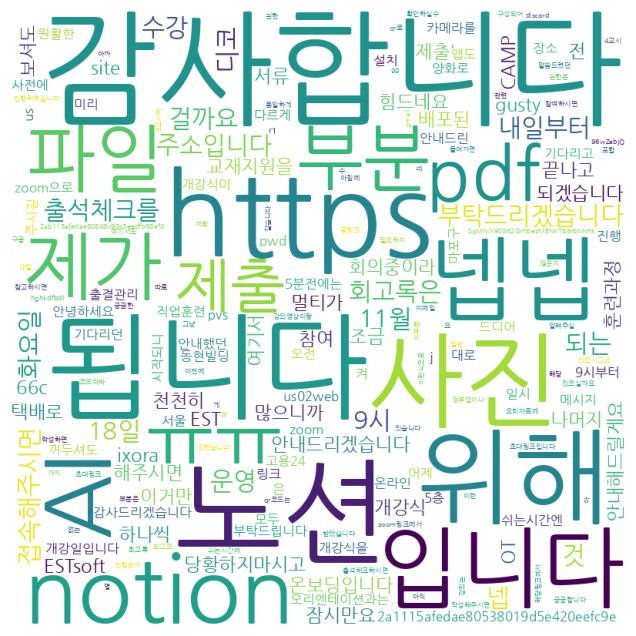

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [98]:
text2 = '콩국수에는 설탕보다 소금을 넣어 먹는게 훨씬 더 맛있다.'
del_w = ['설탕', '훨씬']

for w in del_w:
  text2 = re.sub(w + r'.?', '', text2)

text2

'콩국수에는 다 소금을 넣어 먹는게 더 맛있다.'